In [45]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

### Part 1: Preprocessing

#### Step 1: Load the MNIST Dataset

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
print(f"X_train data: {X_train.shape}")
print(f"X_test data: {X_test.shape}")
print(X_train[0])

#### Step 2: Scale the Data

In [ ]:
# Constants
X_MIN = 0
X_MAX = 255

def min_max_scaler(X):
    X_scaled = (X - X_MIN)/(X_MAX - X_MIN)
    return X_scaled

X_train_scaled = min_max_scaler(X_train)
X_test_scaled = min_max_scaler(X_test)

#### Step 3: Define Noise Function

In [ ]:
# Add gaussian noise
def add_gaussian_noise(X, mean=0.0, std=0.1):
    noise = np.random.normal(mean, std, X.shape)
    X_noisy = X + noise
    return np.clip(X_noisy, 0, 1)  # Ensure values are within [0, 1]

#### Step 4: Visualize the Data

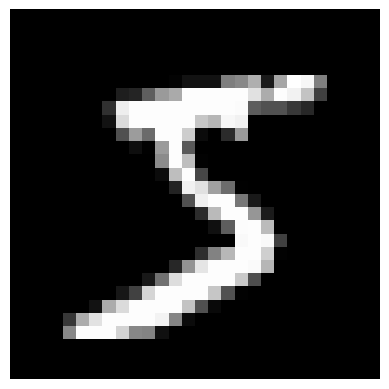

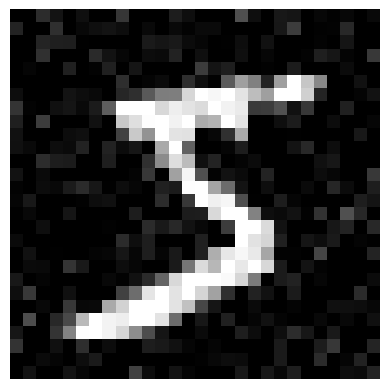

In [ ]:
# Function to display an image
def show_image(image):
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.show()

show_image(X_train_scaled[0])
show_image(add_gaussian_noise(X_train_scaled[0]))

### Part 2: Network Architecture

#### Step 1: Implement the Layer Classes

In [47]:
# Implmenentation of layer classes inspired by Keras 
class Layer:
    def forward(self, inputs):
        raise NotImplementedError("Forward method not implemented.")

    def backward(self, gradients):
        raise NotImplementedError("Backward method not implemented.")
        
class Dense(Layer):
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(input_dim, output_dim) * 0.01
        self.biases = np.zeros((1, output_dim))

    def forward(self, inputs):
        self.inputs = inputs
        return inputs @ self.weights + self.biases

    def backward(self, gradients):
        self.dWeights = self.inputs.T @ gradients
        self.dBiases = np.sum(gradients, axis=0, keepdims=True)
        return gradients @ self.weights.T

    def update(self, eta):
        self.weights -= eta * self.dWeights
        self.biases -= eta * self.dBiases

class Relu(Layer):
    def forward(self, inputs):
        self.inputs = inputs
        return np.maximum(0, inputs)

    def backward(self, gradients):
        return gradients * (self.inputs > 0)

class Sigmoid(Layer):
    def forward(self, inputs):
        self.inputs = inputs
        return 1 / (1 + np.exp(-inputs))

    def backward(self, gradients):
        sig = self.forward(self.inputs)
        return gradients * sig * (1 - sig)

class MeanSquaredError:
    def forward(self, predictions, targets):
        self.predictions = predictions
        self.targets = targets
        return np.mean((predictions - targets) ** 2)

    def backward(self):
        m = self.targets.shape[0]
        return (2 / m) * (self.predictions - self.targets)   

class Sequential:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs

    def backward(self, gradients):
        for layer in reversed(self.layers):
            gradients = layer.backward(gradients)

    def update(self, eta):
        for layer in self.layers:
            if isinstance(layer, Dense):
                layer.update(eta)

#### Step 2: Define the Training Loop

In [ ]:
def train(model, loss_function, X_train, y_train, epochs=10, eta=0.01):
    for epoch in range(epochs):
        predictions = model.forward(X_train)
        loss = loss_function.forward(predictions, y_train)
        gradients = loss_function.backward()
        model.backward(gradients)
        model.update(eta)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

def predict(model, X):
    return model.forward(X)

#### Step 3: Begin Training

Epoch 1/100, Loss: 0.2313
Epoch 2/100, Loss: 0.2272
Epoch 3/100, Loss: 0.2231
Epoch 4/100, Loss: 0.2190
Epoch 5/100, Loss: 0.2147
Epoch 6/100, Loss: 0.2098
Epoch 7/100, Loss: 0.2035
Epoch 8/100, Loss: 0.1939
Epoch 9/100, Loss: 0.1774
Epoch 10/100, Loss: 0.1488
Epoch 11/100, Loss: 0.1045
Epoch 12/100, Loss: 0.0721
Epoch 13/100, Loss: 0.0691
Epoch 14/100, Loss: 0.0684
Epoch 15/100, Loss: 0.0680
Epoch 16/100, Loss: 0.0679
Epoch 17/100, Loss: 0.0677
Epoch 18/100, Loss: 0.0677
Epoch 19/100, Loss: 0.0676
Epoch 20/100, Loss: 0.0675
Epoch 21/100, Loss: 0.0675
Epoch 22/100, Loss: 0.0675
Epoch 23/100, Loss: 0.0675
Epoch 24/100, Loss: 0.0674
Epoch 25/100, Loss: 0.0674
Epoch 26/100, Loss: 0.0674
Epoch 27/100, Loss: 0.0674
Epoch 28/100, Loss: 0.0674
Epoch 29/100, Loss: 0.0674
Epoch 30/100, Loss: 0.0674
Epoch 31/100, Loss: 0.0674
Epoch 32/100, Loss: 0.0674
Epoch 33/100, Loss: 0.0674
Epoch 34/100, Loss: 0.0674
Epoch 35/100, Loss: 0.0675
Epoch 36/100, Loss: 0.0676
Epoch 37/100, Loss: 0.0679
Epoch 38/1

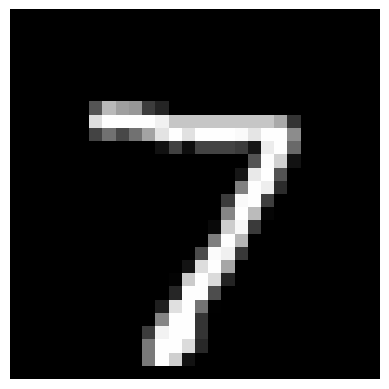

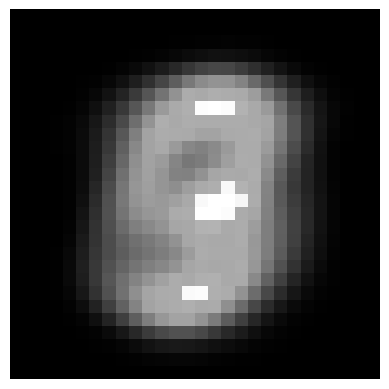

In [44]:
model = Sequential([
    Dense(input_dim=784, output_dim=512),
    Relu(),
    Dense(input_dim=512, output_dim=256),
    Relu(),
    Dense(input_dim=256, output_dim=64),
    Relu(),
    Dense(input_dim=64, output_dim=32),
    Relu(),
    Dense(input_dim=32, output_dim=64),
    Relu(),
    Dense(input_dim=64, output_dim=256),
    Relu(),
    Dense(input_dim=256, output_dim=512),
    Relu(),
    Dense(input_dim=512, output_dim=784),
    Sigmoid()
])

# Prepare training data
X_train_noisy = add_gaussian_noise(X_train_scaled.reshape(-1, 784))
y_train = X_train_scaled.reshape(-1, 784)  # Targets are the original images
train(model, MeanSquaredError(), X_train_noisy, y_train, epochs=100, eta=0.1)
# Test the model
X_test_noisy = add_gaussian_noise(X_test_scaled.reshape(-1, 784))
predictions = predict(model, X_test_noisy)
# Reshape predictions back to image format
predictions_reshaped = predictions.reshape(-1, 28, 28)
# Display the first test image and its denoised prediction
show_image(X_test_scaled[0])
show_image(predictions_reshaped[0])

#### Reflections:
Results after 100 epochs are not that promising but the dense implementation of the DAE did seem to get rid of the noise, reconstruction of the image however is not there. Ideally I would want to proceed with parameter tuning and also include a validation set to track the validation loss but this project was mainly an exercise in understanding how to structure and develop neural networks from the bottom up. In future projects I would also like to inspect the latent space layer to track how changes in the input translate into embedding space.